In [33]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [34]:
# #############
#   load data
# #############
df = pd.read_csv("..\\..\\data\\02_cleanData_properties_data.csv", index_col="ID")
df.shape

(18348, 40)

In [35]:
data_by_type = df.groupby("type")["subtype"].count()
print(data_by_type)

type
APARTMENT    9079
HOUSE        9269
Name: subtype, dtype: int64


In [58]:
types = df.type.unique().tolist()
print(sorted(types))

['APARTMENT', 'HOUSE']


In [37]:
data_by_region = df.groupby(["region"])["type"].count()
display(data_by_region)
# data_by_region.plot(kind="bar")
# plt.show()
# plt.clf()

region
Brussels     2526
Flanders    11148
Wallonie     4674
Name: type, dtype: int64

In [38]:
data_by_region_province = df.groupby(["region", "province"])["type"].count()
display(data_by_region_province)
# data_by_region_province.plot(kind="bar")
# plt.show()
# plt.clf()

region    province       
Brussels  Brussels           2526
Flanders  Antwerp            3143
          East Flanders      2640
          Flemish Brabant    1394
          Limburg             750
          West Flanders      3221
Wallonie  Hainaut            1553
          Liège              1273
          Luxembourg          415
          Namur               670
          Walloon Brabant     763
Name: type, dtype: int64

In [39]:
sns.set_context("notebook")
sns.set_style("darkgrid")

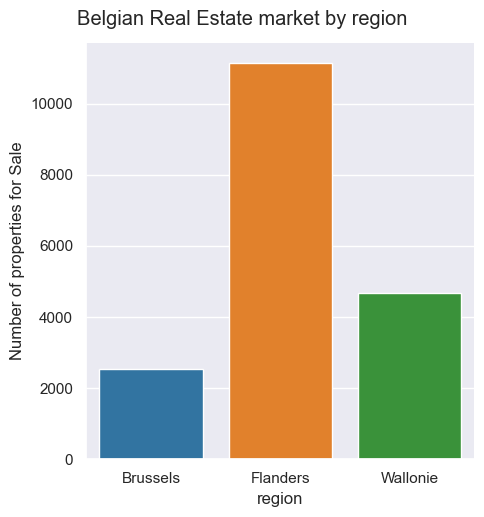

<Figure size 640x480 with 0 Axes>

In [40]:
###
#sns.set_palette(["black", "yellow", "red"])
regions = ["Brussels", "Flanders", "Wallonie"]
property_by_region = sns.catplot(x="region", order=regions, data=df, kind="count")
property_by_region.fig.suptitle("Belgian Real Estate market by region", y=1.03)
property_by_region.set(ylabel="Number of properties for Sale")
plt.show()
plt.clf()

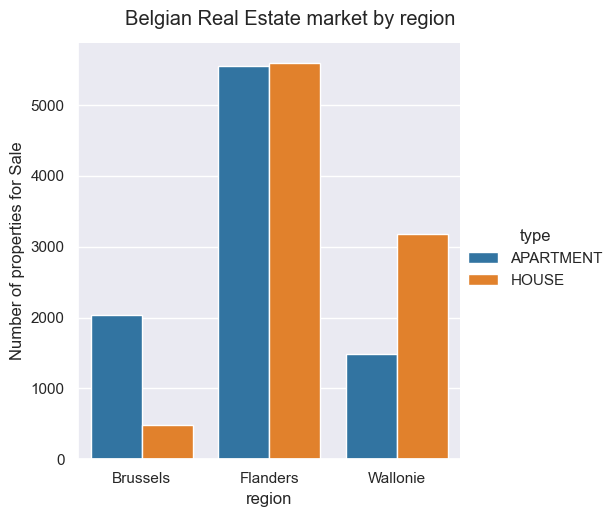

<Figure size 640x480 with 0 Axes>

In [41]:
regions = ["Brussels", "Flanders", "Wallonie"]
property_by_region_and_type = sns.catplot(x="region", order=regions, hue="type", data=df, kind="count")
property_by_region_and_type.fig.suptitle("Belgian Real Estate market by region", y=1.03)
property_by_region_and_type.set(ylabel="Number of properties for Sale")
plt.show()
plt.clf()

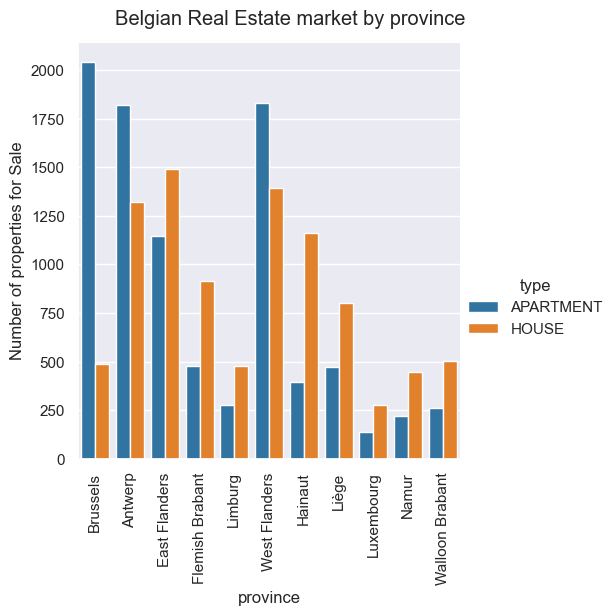

<Figure size 640x480 with 0 Axes>

In [42]:
provinces = ['Brussels', 'Antwerp', 'East Flanders', 'Flemish Brabant', 'Limburg', 'West Flanders', 
             'Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Walloon Brabant']
property_by_province_and_type = sns.catplot(x="province", hue="type", order=provinces, data=df, kind="count")
property_by_province_and_type.fig.suptitle("Belgian Real Estate market by province", y=1.03)
property_by_province_and_type.set(ylabel="Number of properties for Sale")
property_by_province_and_type.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()

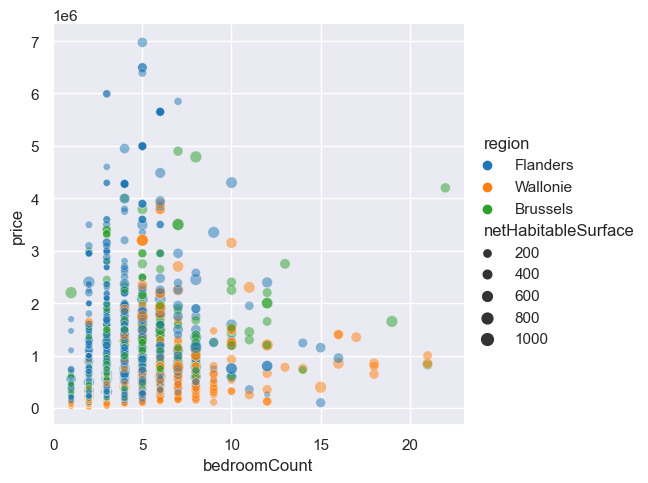

<Figure size 640x480 with 0 Axes>

In [43]:
subset = ["type", "price", "pricePerMeter", "bedroomCount", "netHabitableSurface", "region", "province"]
data = df[subset].dropna()
sns.relplot(
    x="bedroomCount", y="price", hue="region", 
    size="netHabitableSurface", alpha=0.5, data=data, kind="scatter"
    )
plt.show()
plt.clf()

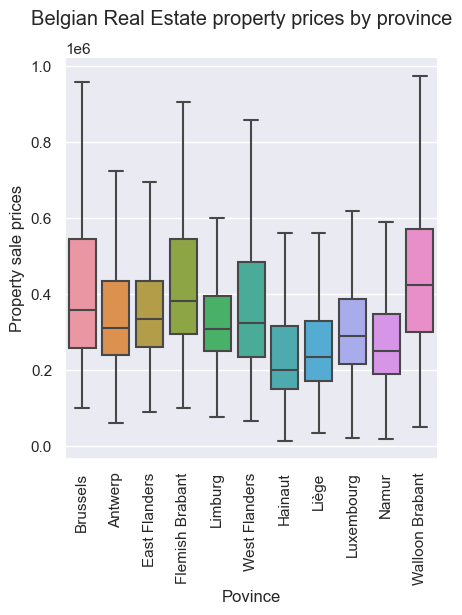

<Figure size 640x480 with 0 Axes>

In [44]:
subset = ["type", "price", "region", "province"]
data_1 = df[subset].dropna()
price_by_province = sns.catplot(
    x="province", y="price", order=provinces, 
    data=data_1, kind="box", sym="")
price_by_province.fig.suptitle("Belgian Real Estate property prices by province", y=1.03)
price_by_province.set(xlabel="Povince",ylabel="Property sale prices")
price_by_province.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()

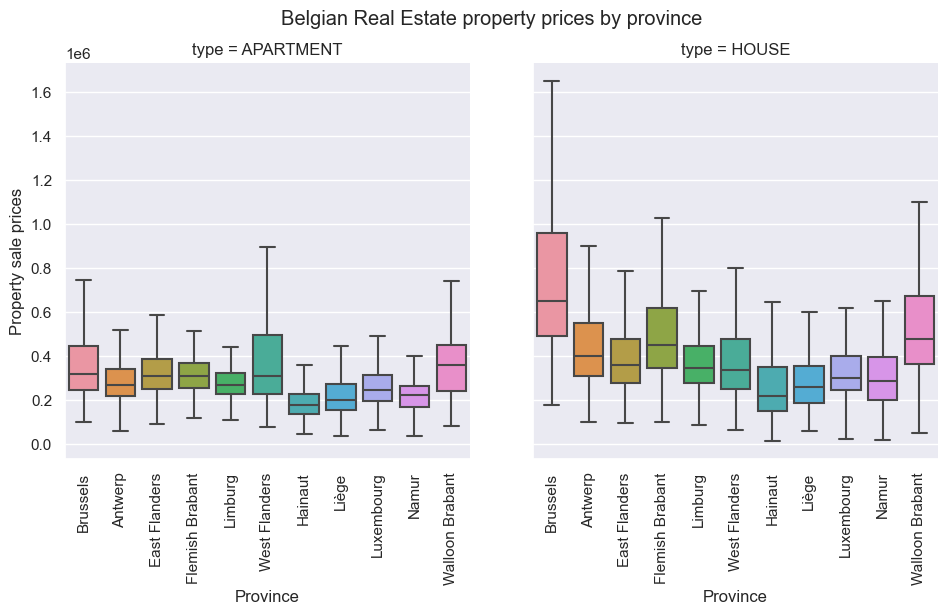

<Figure size 640x480 with 0 Axes>

In [45]:
price_by_province_and_type = sns.catplot(
    x="province", y="price", order=provinces, col="type", 
    data=data_1, kind="box", sym="")
price_by_province_and_type.fig.suptitle("Belgian Real Estate property prices by province", y=1.03)
price_by_province_and_type.set(xlabel="Province", ylabel="Property sale prices")
price_by_province_and_type.tick_params(axis="x", rotation=90)
plt.show()
plt.clf()

In [46]:
subset = ["type", "price", "localityType", "province", "region"]
data_2 = df[subset].dropna()

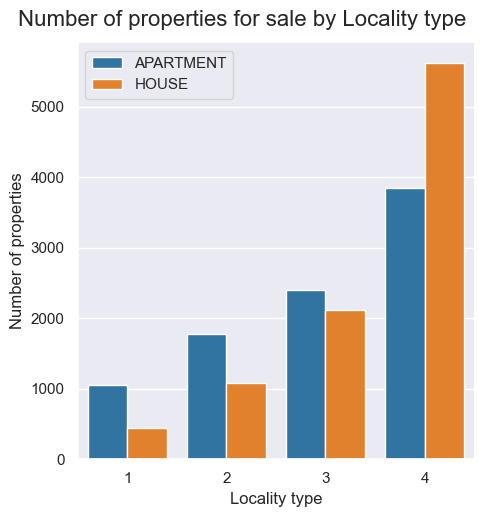

<Figure size 640x480 with 0 Axes>

In [47]:
properties_by_localityType = sns.catplot(
    x="localityType", hue="type", data=data_2, kind="count", legend=False, legend_out=False
    )
properties_by_localityType.fig.suptitle(
    "Number of properties for sale by Locality type", 
    fontsize=16, y=1.03)
properties_by_localityType.set(xlabel="Locality type", ylabel="Number of properties")
properties_by_localityType.add_legend()
plt.show()
plt.clf()

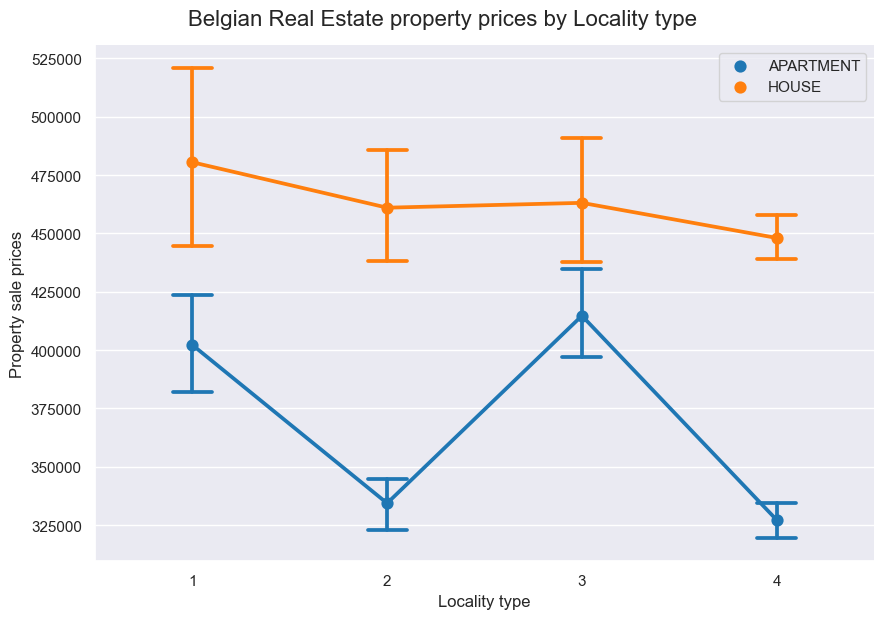

<Figure size 640x480 with 0 Axes>

In [48]:
prices_by_localityType = sns.catplot(
    x="localityType", y="price", hue="type", 
    capsize=0.2, data=data_2, kind="point", legend=False, legend_out=False,
    height=6, aspect=9/6)
prices_by_localityType.fig.suptitle(
    "Belgian Real Estate property prices by Locality type", 
    fontsize=16, y=1.03)
prices_by_localityType.set(xlabel="Locality type", ylabel="Property sale prices")
prices_by_localityType.add_legend()
plt.show()
plt.clf()

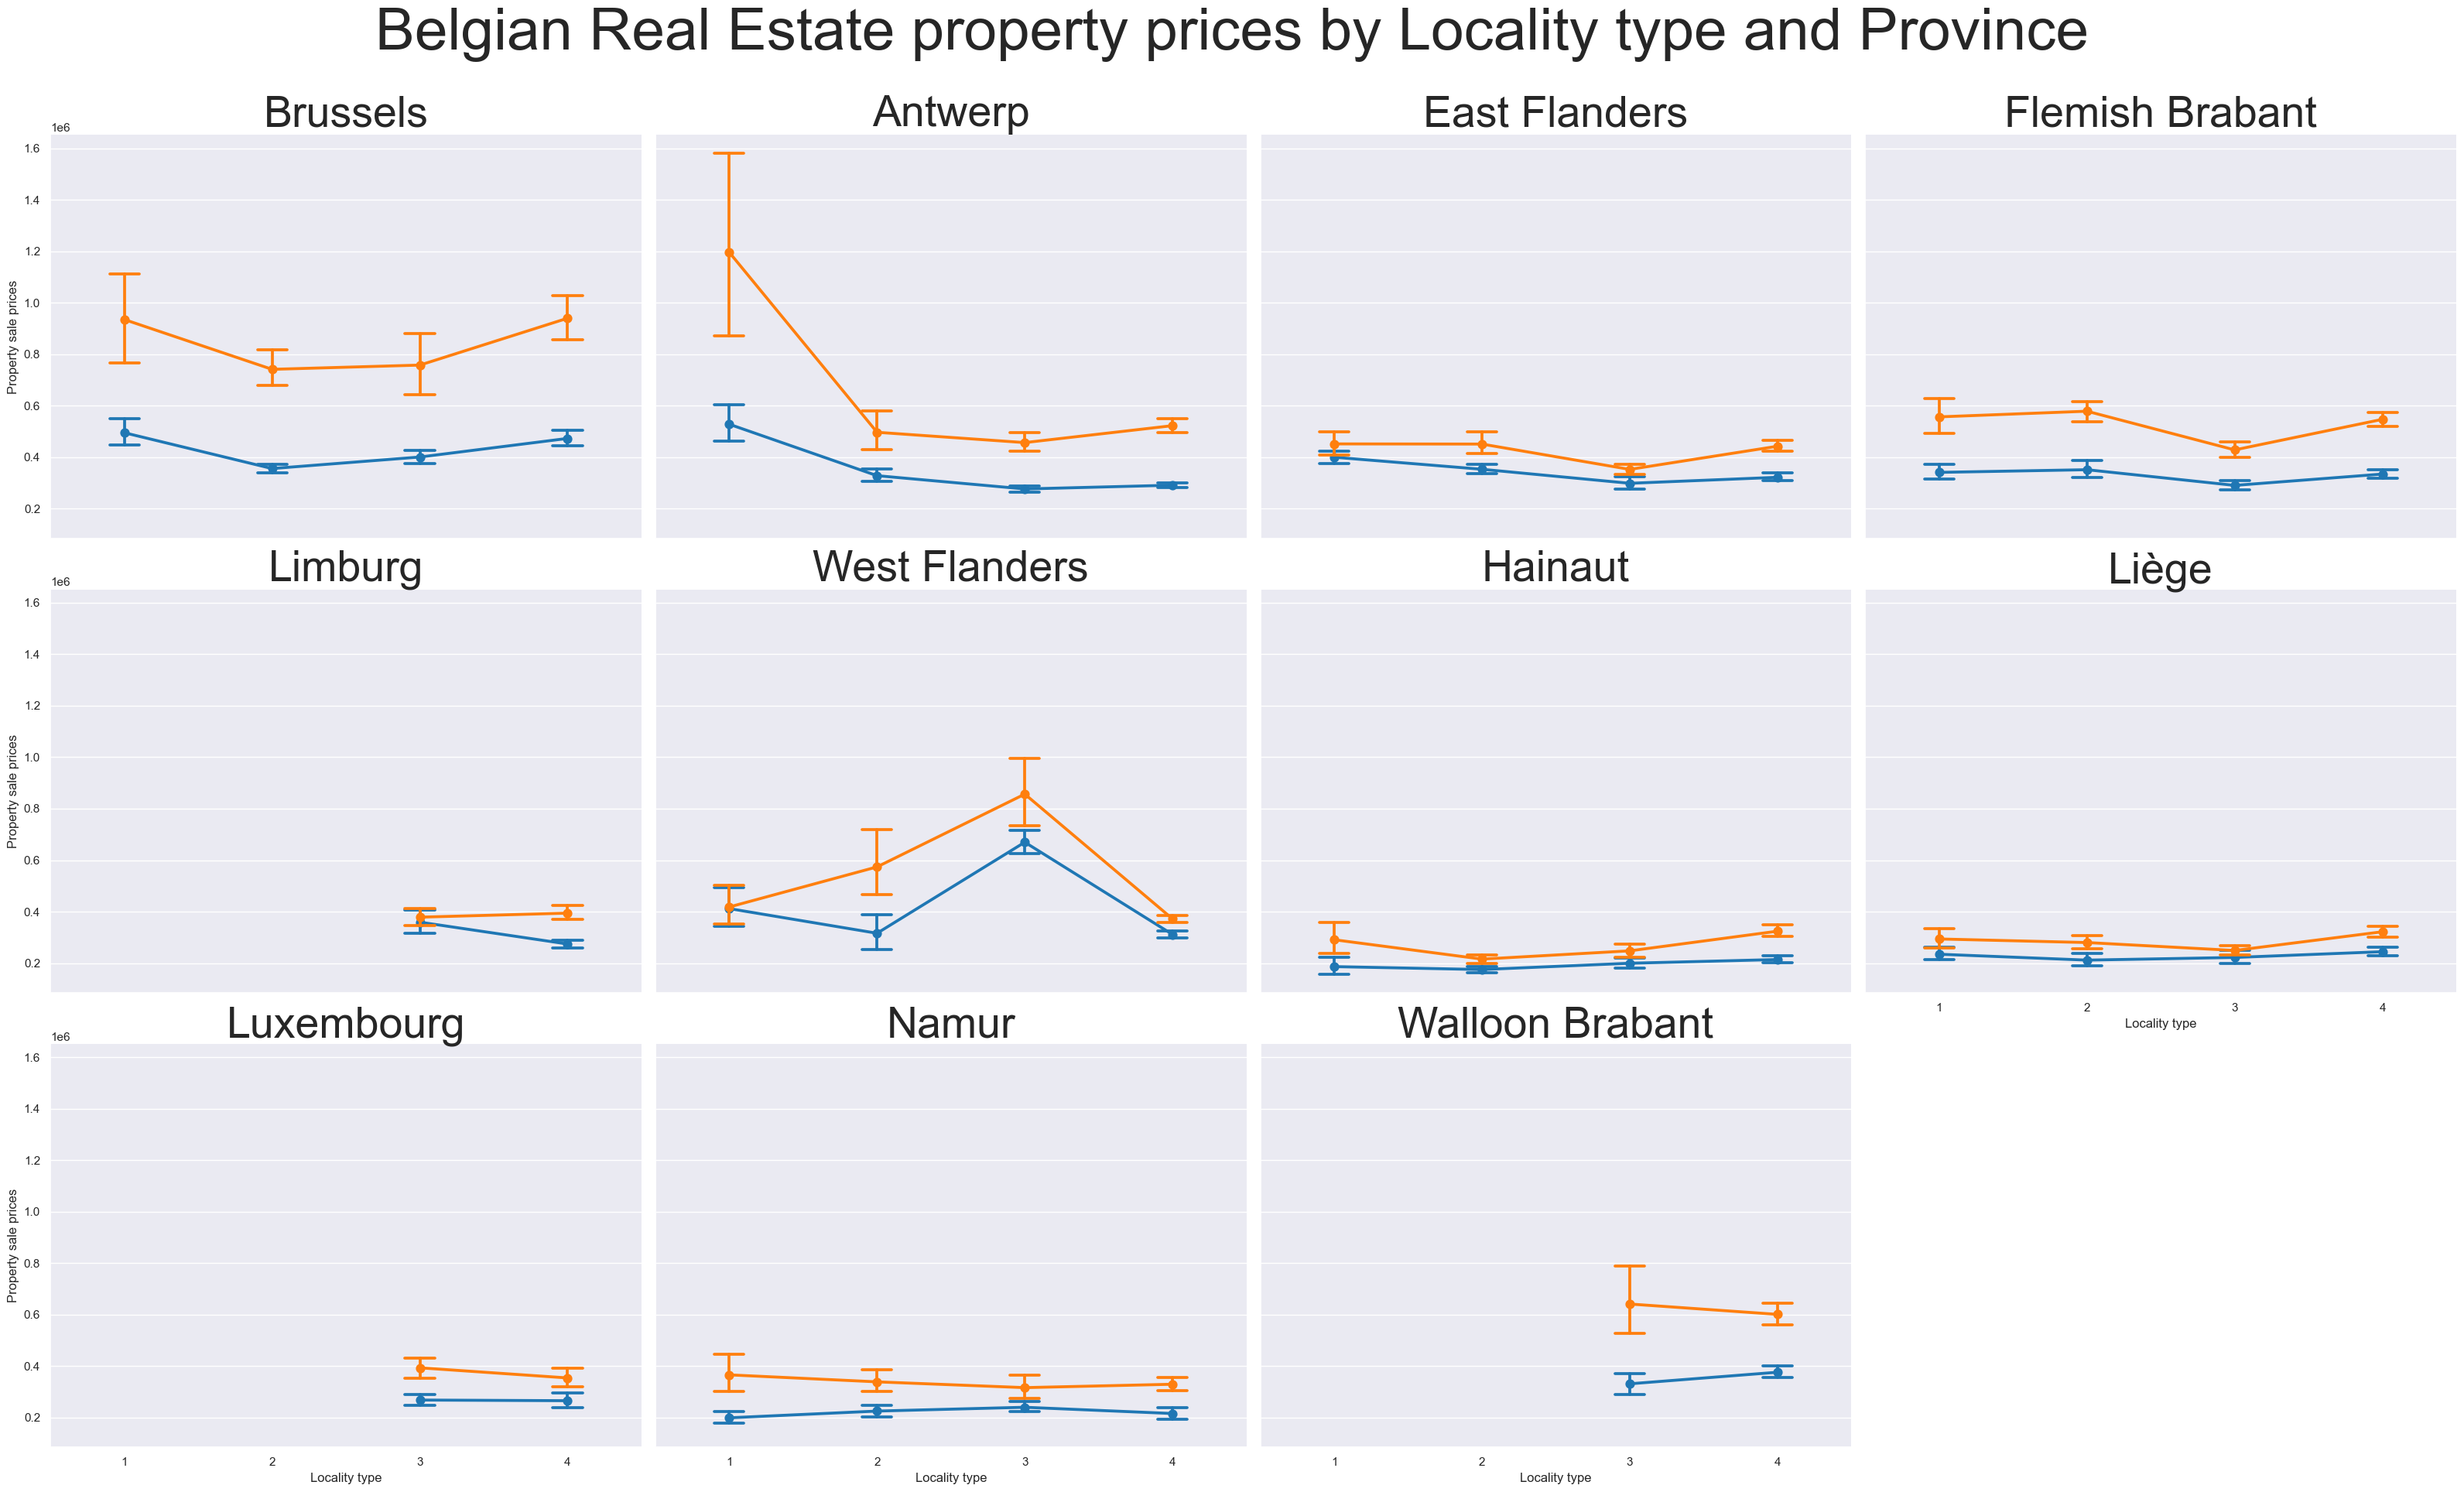

<Figure size 640x480 with 0 Axes>

In [49]:
prices_by_localityType_and_province = sns.catplot(
    x="localityType", y="price", hue="type", 
    col="province", col_wrap=4, col_order=provinces,
    capsize=0.2, data=data_2, kind="point", legend=False, legend_out=True,
    height=6, aspect=8/6)
prices_by_localityType_and_province.fig.suptitle(
    "Belgian Real Estate property prices by Locality type and Province", 
    fontsize=55, y=1.07)
for i, p in enumerate(provinces):
    prices_by_localityType_and_province.fig.axes[i].set_title(p, fontsize=40)
prices_by_localityType_and_province.set(
    xlabel="Locality type", ylabel="Property sale prices"
    )
plt.show()
plt.clf()

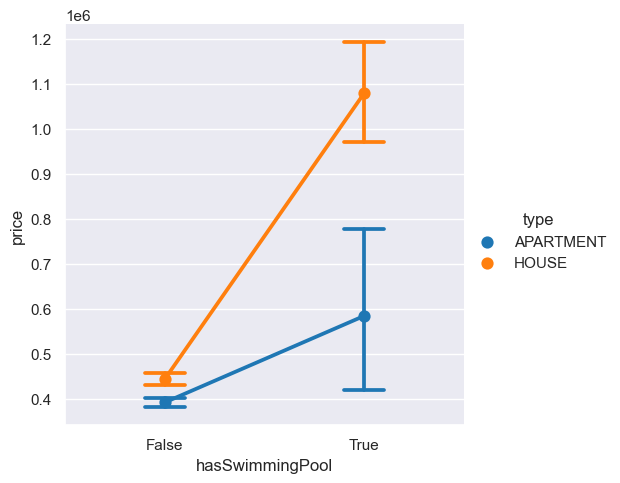

<Figure size 640x480 with 0 Axes>

In [50]:
subset = ["type", "price", "hasSwimmingPool"]
data_3 = df[subset].dropna()
sns.catplot(x="hasSwimmingPool", y="price", hue="type", capsize=0.2, data=data_3, kind="point")
plt.show()
plt.clf()

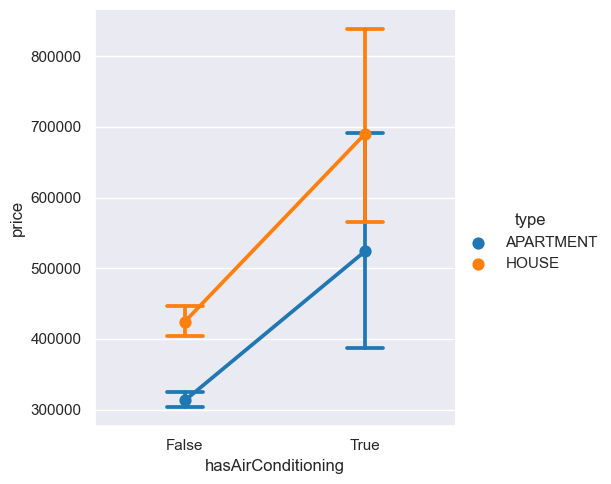

<Figure size 640x480 with 0 Axes>

In [51]:
# hasAirConditioning
subset = ["type", "price", "hasAirConditioning"]
data_4 = df[subset].dropna()
sns.catplot(x="hasAirConditioning", y="price", hue="type", capsize=0.2, data=data_4, kind="point")
plt.show()
plt.clf()

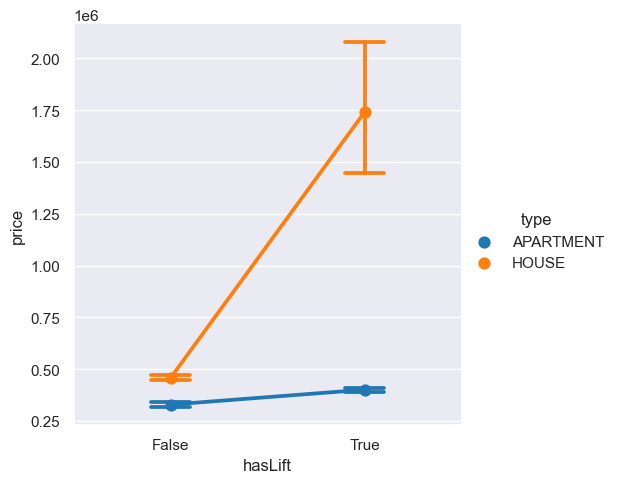

<Figure size 640x480 with 0 Axes>

In [52]:
# hasLift
subset = ["type", "price", "hasLift"]
data_5 = df[subset].dropna()
sns.catplot(x="hasLift", y="price", hue="type", capsize=0.2, data=data_5, kind="point")
plt.show()
plt.clf()

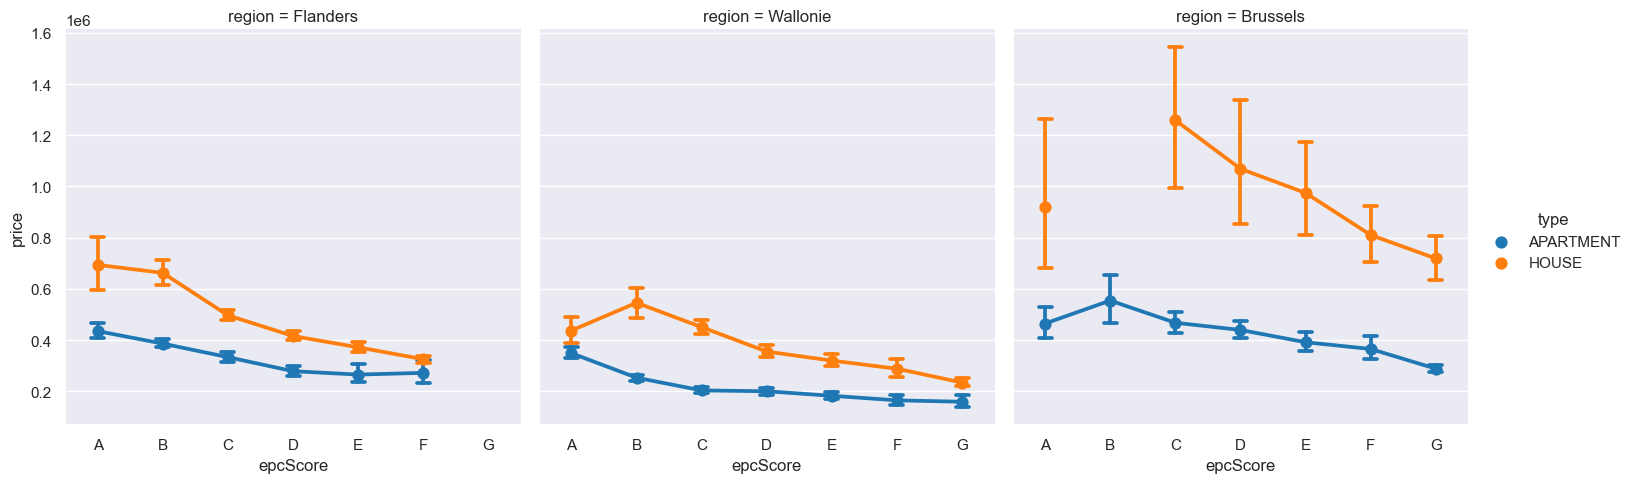

<Figure size 640x480 with 0 Axes>

In [53]:
subset = ["type", "price", "epcScore", "region"]
data_6 = df[subset].dropna()
epc = ["A", "B", "C", "D", "E", "F", "G"]
sns.catplot(x="epcScore", y="price", hue="type", col="region", capsize=0.2, order=epc, data=data_6, kind="point")
plt.show()
plt.clf()

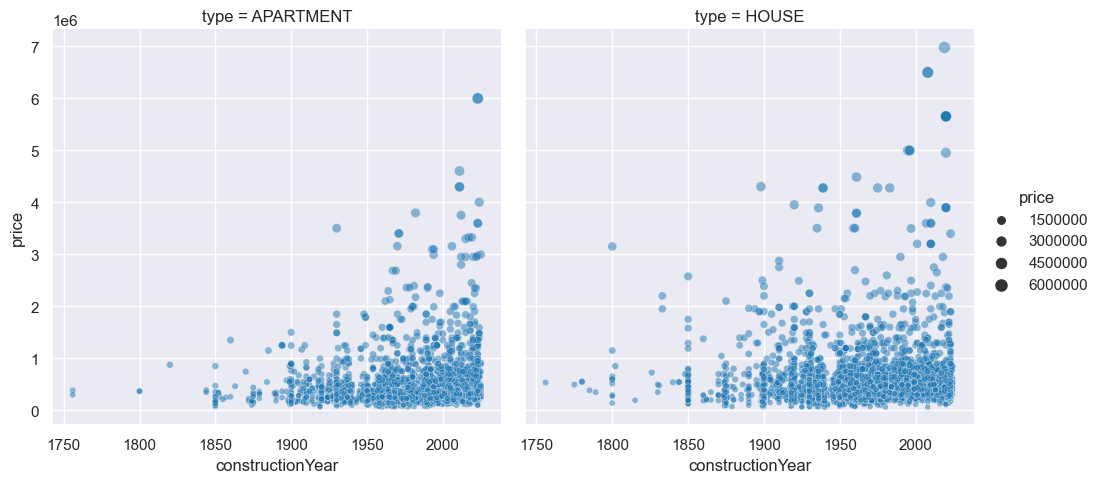

<Figure size 640x480 with 0 Axes>

In [54]:
subset = ["type", "price", "constructionYear", "region"]
data_7 = df[subset].dropna()
sns.relplot(x="constructionYear", y="price", col="type", size="price", alpha=0.5, data=data_7, kind="scatter")
plt.show()
plt.clf()